This is multiplicative inversion $\mathfrak{C^0}$ circuit in $F_{2^8}$ in Figure 12. The current operation of the circuit is $(x^6+x^4+x+1)^{-1}=x^7+x^5+x^4+x^3$

In [1]:
import numpy as np
from qiskit import *
from qiskit_aer import Aer
q1=QuantumRegister(4,'a0')
q2=QuantumRegister(4,'a1')
q3=QuantumRegister(4,'e')
q4=QuantumRegister(4,'b0')
q5=QuantumRegister(4,'b1')


c1 = ClassicalRegister(4)
c2 = ClassicalRegister(4)
c3 = ClassicalRegister(4)
c4 = ClassicalRegister(4)
c5 = ClassicalRegister(4)

In [2]:
# Circuit of isomorphic mapping t^{-1}
qc=QuantumCircuit(q1,q2)
def t_inv(q1,q2):
    qc.cx(q2[3],q1[2])
    qc.cx(q1[1],q2[0])
    qc.cx(q1[3],q1[1])
    qc.cx(q2[1],q1[3])
    qc.cx(q1[2],q2[1])
    qc.cx(q1[2],q1[0])
    qc.cx(q1[1],q2[2])
    qc.cx(q1[3],q2[3])
    qc.cx(q2[3],q2[0])
    qc.cx(q2[0],q1[2])

    qc.swap(q2[1],q2[3])
    qc.swap(q1[1],q2[0])
    qc.swap(q1[1],q1[3])


In [3]:
# Reverse order circuit of isomorphic mapping t^{-1}
qc=QuantumCircuit(q1,q2)
def t_inv_r(q1,q2):
    qc.swap(q1[1],q1[3])
    qc.swap(q1[1],q2[0])
    qc.swap(q2[1],q2[3])

    qc.cx(q2[0],q1[2])
    qc.cx(q2[3],q2[0])
    qc.cx(q1[3],q2[3])
    qc.cx(q1[1],q2[2])
    qc.cx(q1[2],q1[0])
    qc.cx(q1[2],q2[1])
    qc.cx(q2[1],q1[3])
    qc.cx(q1[3],q1[1])
    qc.cx(q1[1],q2[0])
    qc.cx(q2[3],q1[2])

In [4]:
# multiplication C^0 circuit in F2^4
qc=QuantumCircuit(q1,q2,q3)
def mul(q1,q2,q3):
    qc.cx(q1[1],q1[0])
    qc.cx(q2[1],q2[0])
    qc.cx(q1[0],q1[3])
    qc.cx(q2[0],q2[3])
    qc.ccx(q1[0],q2[0],q3[3])
    qc.ccx(q1[1],q2[1],q3[1])
    qc.ccx(q1[3],q2[3],q3[0])
    qc.cx(q1[3],q1[0])
    qc.cx(q2[3],q2[0])
    qc.cx(q1[1],q1[3])
    qc.cx(q2[1],q2[3])
    qc.cx(q3[0],q3[2])
    qc.cx(q3[1],q3[0])
    qc.cx(q3[3],q3[1])
    qc.cx(q3[2],q3[3])
    qc.cx(q3[2],q3[0])
    qc.cx(q3[1],q3[2])
    qc.ccx(q1[0],q2[0],q3[0])
    qc.ccx(q1[3],q2[3],q3[2])
    qc.cx(q1[3],q1[0])
    qc.cx(q2[3],q2[0])
    qc.cx(q1[2],q1[0])
    qc.cx(q2[2],q2[0])
    qc.cx(q1[2],q1[1])
    qc.cx(q2[2],q2[1])
    qc.cx(q1[0],q1[3])
    qc.cx(q2[0],q2[3])
    qc.cx(q3[0],q3[3])
    qc.cx(q3[2],q3[0])
    qc.cx(q3[0],q3[1])
    qc.ccx(q1[0],q2[0],q3[2])
    qc.ccx(q1[1],q2[1],q3[3])
    qc.ccx(q1[2],q2[2],q3[1])
    qc.ccx(q1[3],q2[3],q3[0])
    qc.cx(q1[2],q1[0])
    qc.cx(q2[2],q2[0])
    qc.cx(q1[2],q1[1])
    qc.cx(q2[2],q2[1])
    qc.cx(q1[2],q1[3])
    qc.cx(q2[2],q2[3])

In [5]:
# squared constant multiplication 
qc=QuantumCircuit(q1)

def s_constant(q1):
    qc.swap(q1[0],q1[1])
    qc.swap(q1[0],q1[3])
    qc.swap(q1[0],q1[2])

In [6]:
# reverse order circuit of squared constant multiplication
qc=QuantumCircuit(q1)

def s_constant_r(q1):
    qc.swap(q1[0],q1[2])
    qc.swap(q1[0],q1[3])
    qc.swap(q1[0],q1[1])

In [7]:
# inversion in F2^4
qc=QuantumCircuit(q1,q2)
def inverse(q1,q2):
    qc.cx(q1[3],q1[0])
    qc.cx(q1[2],q1[1])
    qc.ccx(q1[1],q1[3],q1[2])
    qc.ccx(q1[0],q1[2],q1[1])
    qc.cx(q1[3],q1[2])
    qc.cx(q1[2],q1[0])
    qc.cx(q1[1],q1[2])
    qc.ccx(q1[3],q1[2],q2[0])
    qc.ccx(q1[1],q2[0],q1[0])
    qc.ccx(q1[3],q1[2],q2[0])
    qc.ccx(q1[0],q1[2],q1[3])
    qc.ccx(q1[1],q1[3],q1[2])
    qc.cx(q1[2],q1[3])
    qc.cx(q1[1],q1[0])
    qc.swap(q1[3],q1[1])

In [8]:
# reverse order circuit of multiplication C^0 circuit in F2^4
qc=QuantumCircuit(q1,q2,q3)
def mul_r(q1,q2,q3):
    qc.cx(q2[2],q2[3])
    qc.cx(q1[2],q1[3])
    qc.cx(q2[2],q2[1])
    qc.cx(q1[2],q1[1])
    qc.cx(q2[2],q2[0])
    qc.cx(q1[2],q1[0])
    qc.ccx(q1[3],q2[3],q3[0])
    qc.ccx(q1[2],q2[2],q3[1])
    qc.ccx(q1[1],q2[1],q3[3])
    qc.ccx(q1[0],q2[0],q3[2])
    qc.cx(q3[0],q3[1])
    qc.cx(q3[2],q3[0])
    qc.cx(q3[0],q3[3])
    qc.cx(q2[0],q2[3])
    qc.cx(q1[0],q1[3])
    qc.cx(q2[2],q2[1])
    qc.cx(q1[2],q1[1])
    qc.cx(q2[2],q2[0])
    qc.cx(q1[2],q1[0])
    qc.cx(q2[3],q2[0])
    qc.cx(q1[3],q1[0])
    qc.ccx(q1[3],q2[3],q3[2])
    qc.ccx(q1[0],q2[0],q3[0])
    qc.cx(q3[1],q3[2])
    qc.cx(q3[2],q3[0])
    qc.cx(q3[2],q3[3])
    qc.cx(q3[3],q3[1])
    qc.cx(q3[1],q3[0])
    qc.cx(q3[0],q3[2])
    qc.cx(q2[1],q2[3])
    qc.cx(q1[1],q1[3])
    qc.cx(q2[3],q2[0])
    qc.cx(q1[3],q1[0])
    qc.ccx(q1[3],q2[3],q3[0])
    qc.ccx(q1[1],q2[1],q3[1])
    qc.ccx(q1[0],q2[0],q3[3])
    qc.cx(q2[0],q2[3])
    qc.cx(q1[0],q1[3])
    qc.cx(q2[1],q2[0])
    qc.cx(q1[1],q1[0])
    

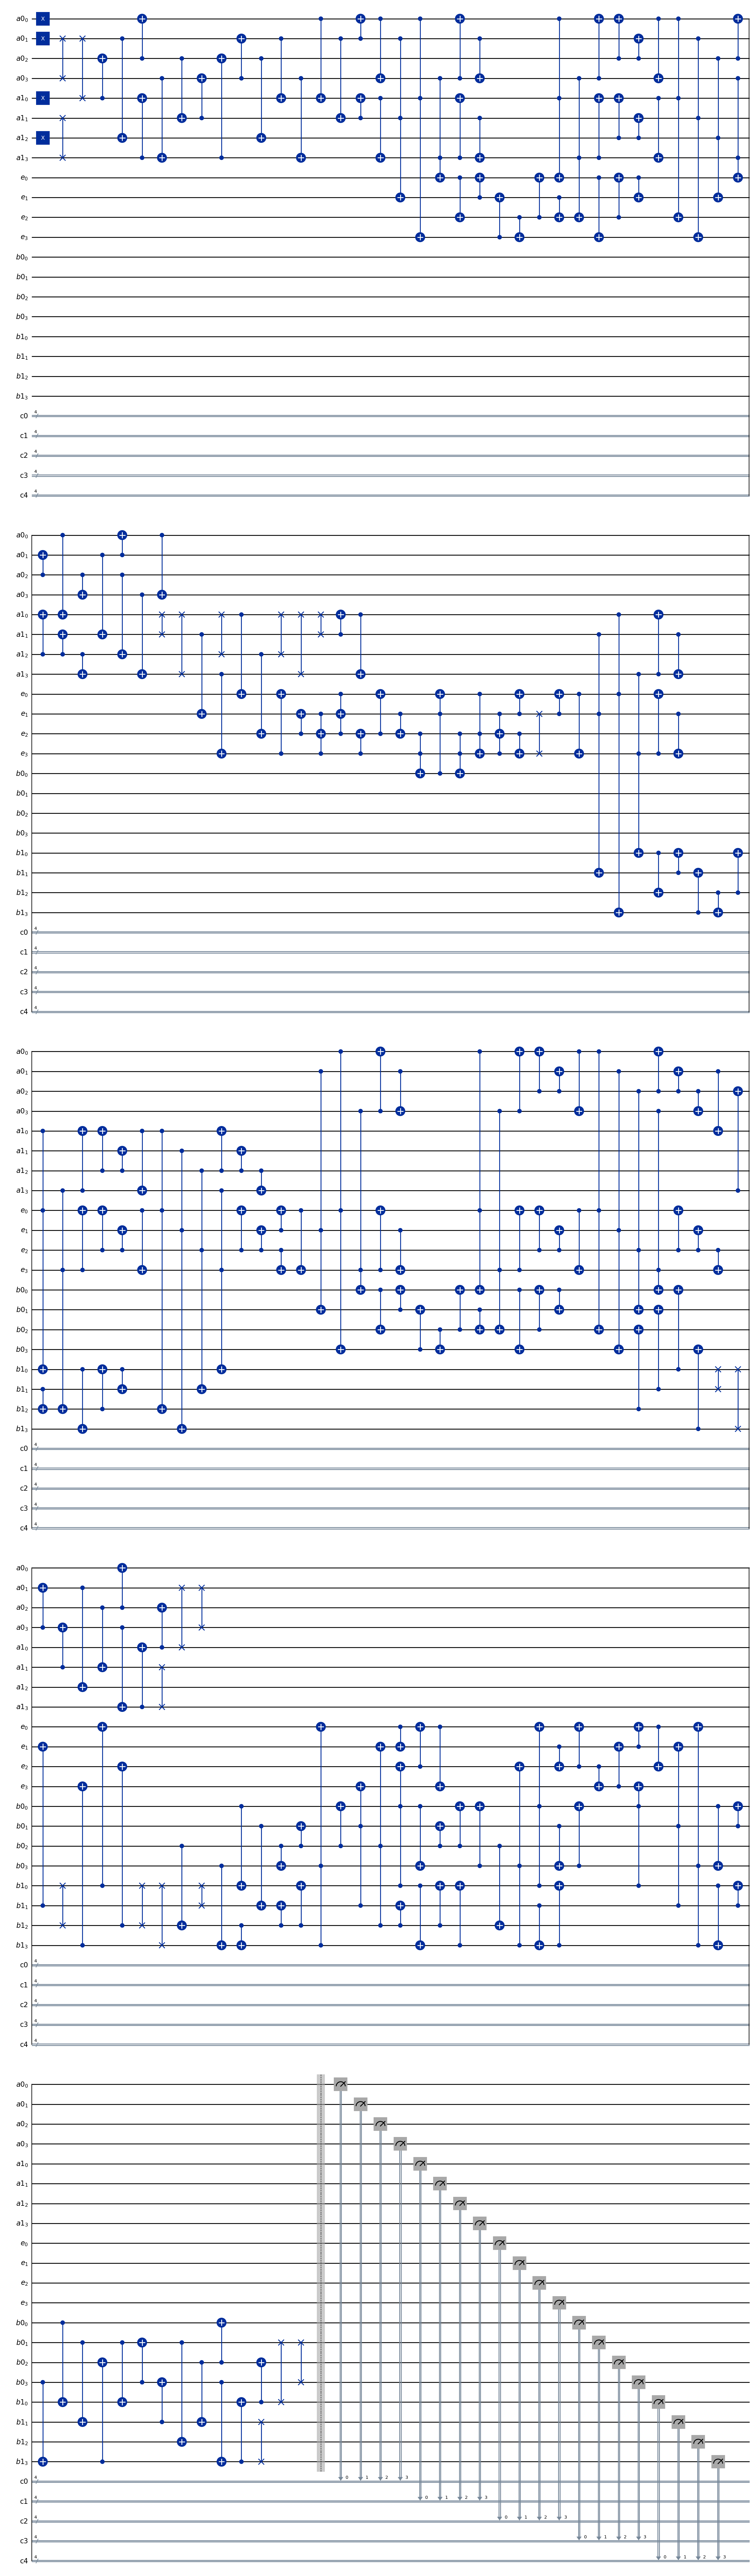

In [9]:
qc=QuantumCircuit(q1,q2,q3,q4,q5,c1,c2,c3,c4,c5)

qc.x(q1[0])
qc.x(q1[1])
#qc.x(q1[2])
#qc.x(q1[3])
qc.x(q2[0])
#qc.x(q2[1])
qc.x(q2[2])
#qc.x(q2[3])

t_inv_r(q1,q2)
for i in range(4):
    qc.cx(q1[i],q2[i])

mul(q1,q2,q3)
for i in range(4):
    qc.cx(q1[i],q2[i])

s_constant(q2)
for i in range(4):
    qc.cx(q2[i],q3[i])

s_constant_r(q2)
inverse(q3,q4)
mul(q2,q3,q5)
mul(q1,q3,q4)

for i in range(4):
    qc.cx(q5[i],q4[i])
s_constant(q5)

for i in range(4):
    qc.cx(q5[i],q3[i])
s_constant_r(q5)

for i in range(4):
    qc.cx(q4[i],q5[i])
mul_r(q4,q5,q3)
for i in range(4):
    qc.cx(q4[i],q5[i])

t_inv(q1,q2)
t_inv(q4,q5)

qc.barrier(q1,q2,q3,q4,q5)
qc.measure(q1,c1)
qc.measure(q2,c2)
qc.measure(q3,c3)
qc.measure(q4,c4)
qc.measure(q5,c5)

qc.draw('mpl',fold=36)

In [10]:
from qiskit_aer import Aer
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc, shots=10, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['1011 1000 0000 0101 0011', '1011 1000 0000 0101 0011', '1011 1000 0000 0101 0011', '1011 1000 0000 0101 0011', '1011 1000 0000 0101 0011', '1011 1000 0000 0101 0011', '1011 1000 0000 0101 0011', '1011 1000 0000 0101 0011', '1011 1000 0000 0101 0011', '1011 1000 0000 0101 0011']


In [11]:
print(qc.count_ops())

OrderedDict([('cx', 189), ('ccx', 43), ('swap', 22), ('measure', 20), ('x', 4), ('barrier', 1)])
